In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import random

np.random.seed(29)  # For numpy numbers
random.seed(29)   # For Python

In [2]:
#### Extract all file paths #####

def extract_file_paths(path):
    image_filenames = []
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            for file in files:
                if(file[-3:] == "png" or file[-3:] == "PNG"):
                    image_filenames.append(str(root)+os.sep+str(file))
    print(len(image_filenames))
    return image_filenames


In [3]:
#Original Data Distribution

image_filenames = extract_file_paths("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/Original Data/train")

species = []
for image in image_filenames:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species.append(base)

species_count = [[x,species.count(x)] for x in set(species)]
species_df = pd.DataFrame(species_count, columns=["Species", "Count"])
print(species_df)
#species_df.to_csv("Augmentation.csv")

4750
                      Species  Count
0            Loose Silky-bent    654
1                    Cleavers    287
2                       Maize    221
3   Small-flowered Cranesbill    496
4           Scentless Mayweed    516
5             Shepherds Purse    231
6                  Sugar beet    385
7            Common Chickweed    611
8                 Black-grass    263
9                Common wheat    221
10                   Charlock    390
11                    Fat Hen    475


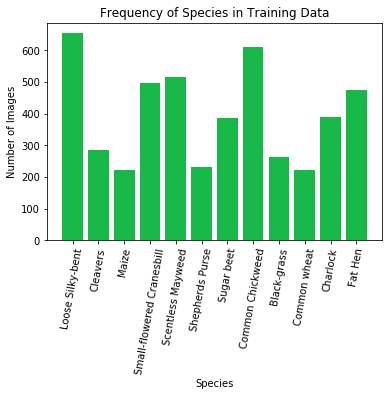

In [4]:
#Plot Originial Dataset

plt.bar(species_df.Species, species_df.Count, color = '#18B848')
plt.title("Frequency of Species in Training Data")
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.xticks(rotation = 80)
plt.show()

In [5]:
# Get list of species and the dimensions of each image

species_list = []
height = []
width = []

for image in image_filenames:
    img = cv2.imread(image)
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species_list.append(base)
    height.append(img.shape[0])
    width.append(img.shape[1])


KeyboardInterrupt: 

In [ ]:
#Convert to Dataframe

image_dim = {"Species": species_list, "Height": height, "Width": width}
image_dim_df = pd.DataFrame(image_dim, columns = ["Species", "Height", "Width"])


In [ ]:
#Check image size for each species by quartiles

image_dim_df.groupby('Species').quantile([0, 0.25, 0.5, 0.75, 1])

In [ ]:
#Plot image dimension distribution

sns.distplot(height, hist=True, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.title('Image Height Distribution')
plt.xlabel('Image Height')
plt.ylabel('Density')
plt.show()

In [ ]:
### Creating Validation Folders and Dataset ###

#Make empty validation and testing directories
validpath = r'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/validation' 
if not os.path.exists(validpath):
    os.makedirs(validpath)
testpath = r'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/test' 
if not os.path.exists(testpath):
    os.makedirs(testpath)

#Make empty species folders in each validation and testing directories
for i in set(species):
    path = 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/validation/{}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path) 
for i in set(species):
    path = 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/test/{}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path) 

In [ ]:
#### Populating validation and testing datasets #### 

#Reset path to augmented training dataset
path = 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train'
roots = []
for root, dirs, files in os.walk(path):
    roots.append(root)
    
print(roots[1:])

# Shuffle training, select first 15%, and redirect to validation directory into the appropriate species folder

for root in roots[1:]:  
    images = []
    for root, dirs, files in os.walk(root):
        for file in files:
            images.append(str(root)+os.sep+str(file))
    random.shuffle(images)
    valid_images = images[:int(0.15 * len(images))]
    print(len(valid_images))
    for image in valid_images:
        split_im = image.split("train",1)
        os.rename(image, split_im[0]+'validation'+split_im[1])


Shuffle training, select first 25%, and redirect to testing directory into the appropriate species folder

for root in roots[1:]:  
    images = []
    for root, dirs, files in os.walk(root):
        for file in files:
            images.append(str(root)+os.sep+str(file))
    random.shuffle(images)
    test_images = images[:int(0.25 * len(images))]
    print(len(test_images))
    for image in test_images:
        split_im = image.split("train",1)
        os.rename(image, split_im[0]+'test'+split_im[1])

print(set(species))

In [ ]:
#Get new count of species in training dataset

extract_file_paths("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train")

species = []
for image in image_filenames:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species.append(base)

species_count = [[x,species.count(x)] for x in set(species)]
species_df = pd.DataFrame(species_count, columns=["Species", "Count"])
print(species_df)